<h2 align='center' style='color:blue'>Exercise: Outlier Detection and Removal Using IQR</h2>

You are given height_weight.csv file which contains heights and weights of 1000 people. Dataset is taken from here,
https://www.kaggle.com/mustafaali96/weight-height

You need to do this,

(1) Load this csv in pandas dataframe and first plot histograms for height and weight parameters

(2) Using IQR detect weight outliers and print them

(3) Using IQR, detect height outliers and print them

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_set = pd.read_csv('height_weight.csv')
data_set

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [3]:
data_set.head()

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


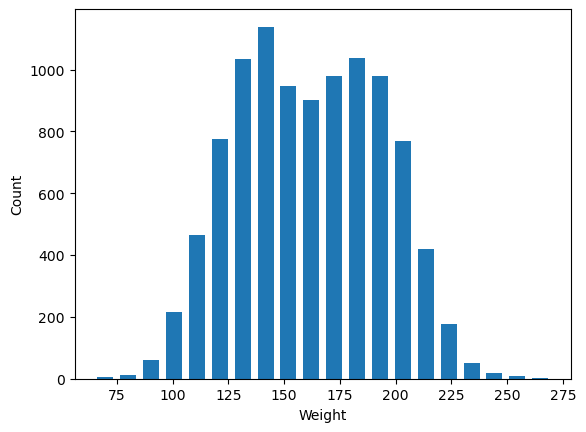

In [21]:
plt.hist(data_set['weight'], bins=20,rwidth=0.7)
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

**Histgram for weights**

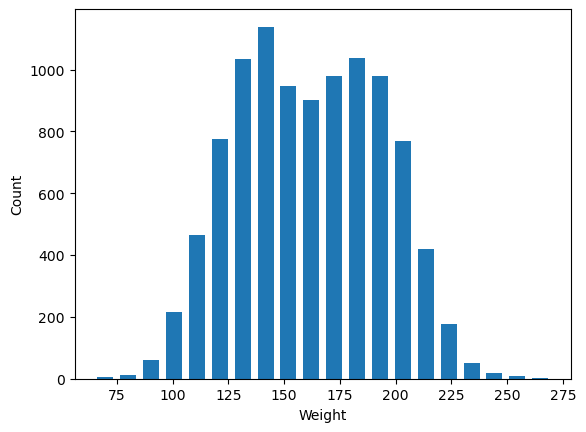

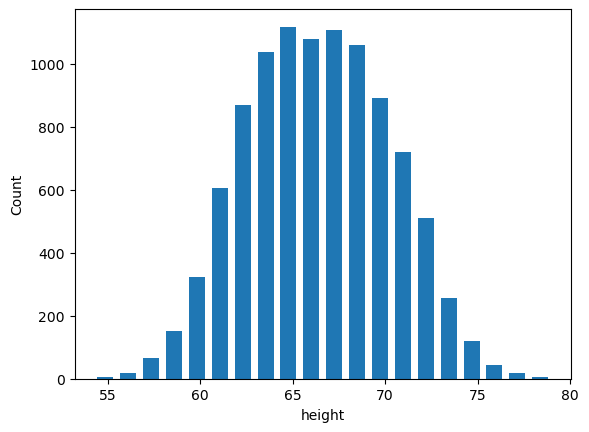

In [22]:
plt.hist(data_set['height'], bins=20,rwidth=0.7)
plt.xlabel('height')
plt.ylabel('Count')
plt.show()

**Histgram for heights**

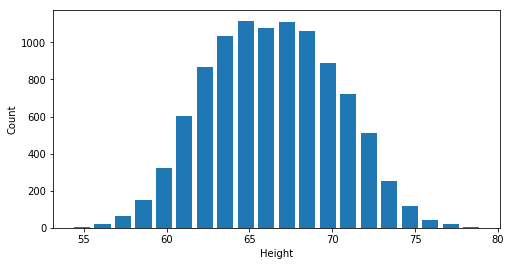

**Detect outliers based on weight, Q1, Q3**

In [26]:
Q1 = data_set['weight'].quantile(0.25)
Q3 = data_set['weight'].quantile(0.75)
Q1,Q3




(135.8180513055015, 187.16952486868348)

(135.8180513055015, 187.16952486868348)

### IQR

In [27]:
IQR = Q3 - Q1
IQR

51.35147356318197

51.35147356318197

### Upperlimit, lowerlimit

In [28]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
lower_limit,upper_limit

(58.79084096072856, 264.19673521345646)

(58.79084096072856, 264.19673521345646)

### Find the outlier records

In [31]:
outliers = data_set[(data_set['weight'] < lower_limit) | (data_set['weight'] > upper_limit)]
outliers

,gender,height,weight
2014,Male,78.998742,269.989699


,gender,height,weight
2014,Male,78.998742,269.989699


**Find the no outlier records**

In [32]:
no_outliers = data_set[(data_set['weight'] >= lower_limit) & (data_set['weight'] <= upper_limit)]
no_outliers

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
